In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [59]:
data = pd.read_csv('HeartDiseaseTrain-Test.csv')
pd.set_option('display.max_columns', None)
data.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
5,58,Female,Typical angina,100,248,Lower than 120 mg/ml,Normal,122,No,1.0,Flat,Zero,Fixed Defect,1
6,58,Male,Typical angina,114,318,Lower than 120 mg/ml,Left ventricular hypertrophy,140,No,4.4,Upsloping,Three,Normal,0
7,55,Male,Typical angina,160,289,Lower than 120 mg/ml,Normal,145,Yes,0.8,Flat,One,Reversable Defect,0
8,46,Male,Typical angina,120,249,Lower than 120 mg/ml,Normal,144,No,0.8,Downsloping,Zero,Reversable Defect,0
9,54,Male,Typical angina,122,286,Lower than 120 mg/ml,Normal,116,Yes,3.2,Flat,Two,Fixed Defect,0


## Cleaning Dataset

In [39]:
print(data.isnull().sum())

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [61]:
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['fasting_blood_sugar'] = label_encoder.fit_transform(data['fasting_blood_sugar'])
data['target'] = label_encoder.fit_transform(data['target'])
data = pd.get_dummies(data, columns=['chest_pain_type', 'rest_ecg', 'exercise_induced_angina', 
                                      'slope', 'vessels_colored_by_flourosopy', 'thalassemia'], drop_first=True)
scaler = StandardScaler()
data.head()

,age,sex,resting_blood_pressure,cholestoral,fasting_blood_sugar,Max_heart_rate,oldpeak,target,Cluster,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,rest_ecg_Normal,rest_ecg_ST-T wave abnormality,exercise_induced_angina_Yes,slope_Flat,slope_Upsloping,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
0,52,1,125,212,1,168,1.0,0,2,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True
1,53,1,140,203,0,155,3.1,0,2,False,False,True,True,False,True,False,True,False,False,False,True,False,False,True
2,70,1,145,174,1,125,2.6,0,2,False,False,True,False,True,True,False,True,False,False,False,True,False,False,True
3,61,1,148,203,1,161,0.0,0,2,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True
4,62,0,138,294,0,106,1.9,0,0,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False


## Clustering Data

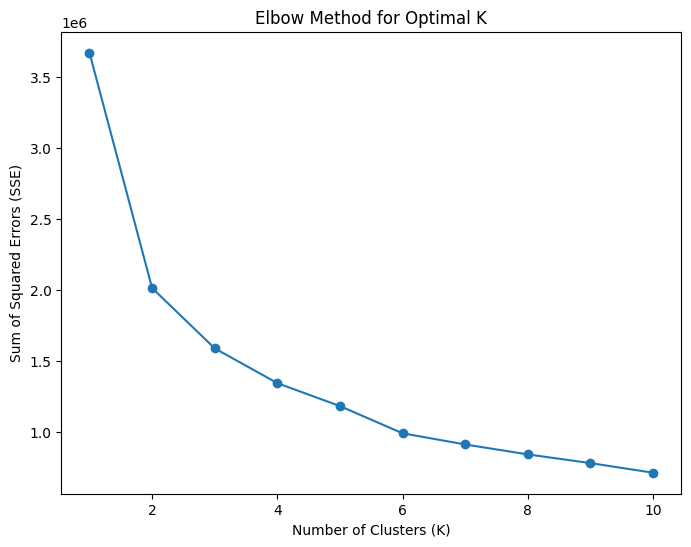

In [62]:
features = data.drop(columns=['target'])

# Step 1: Find the optimal value of K using the Elbow Method
sse = []
for k in range(1, 11):  # Test for k values between 1 and 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)  # SSE (sum of squared errors) for this k value

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [63]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features)

# Add the cluster labels to the data
data['Cluster'] = clusters

# Inspect cluster characteristics
cluster_summary = data.groupby('Cluster').mean()
print("\nCluster Summary:")
cluster_summary



Cluster Summary:


,age,sex,resting_blood_pressure,cholestoral,fasting_blood_sugar,Max_heart_rate,oldpeak,target,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,rest_ecg_Normal,rest_ecg_ST-T wave abnormality,exercise_induced_angina_Yes,slope_Flat,slope_Upsloping,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
Cluster,,,,,,,,,,,,,,,,,,,,,,,
0,56.471774,0.604839,136.931452,314.689516,0.814516,145.782258,1.272581,0.358871,0.177419,0.165323,0.600806,0.588710,0.379032,0.431452,0.520161,0.060484,0.205645,0.145161,0.173387,0.475806,0.000000,0.048387,0.451613
1,55.105727,0.718062,131.033040,245.874449,0.865639,151.374449,0.930176,0.557269,0.169604,0.312775,0.429515,0.504405,0.495595,0.303965,0.462555,0.074890,0.246696,0.041850,0.138767,0.550661,0.000000,0.046256,0.407489
2,51.925697,0.733746,128.340557,193.436533,0.857585,148.495356,1.115789,0.569659,0.142415,0.312693,0.473684,0.377709,0.600619,0.309598,0.442724,0.077399,0.195046,0.043344,0.086687,0.650155,0.021672,0.095975,0.349845
